<a href="https://colab.research.google.com/github/Abhay069/Music-Recommendation-App/blob/main/Music_Recommendation_App0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the library


In [ ]:
import os
import json
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Data Collection and converting to pandas datafram

In [ ]:
# convrting data into pandas datafram
song_df = pd.read_csv("/content/spotify_millsongdata.csv")
song_df.shape

(57650, 4)

In [ ]:
song_df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
song_df.tail()

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [ ]:
# information about data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
# checking if any value is missing
song_df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


Counting top 15 artist

In [ ]:
top15_artist = song_df['artist'].value_counts().head(15)
print(top15_artist)
print("\nTop 15 Artist")                                   # for adding a heading

artist
Donna Summer         191
Gordon Lightfoot     189
Bob Dylan            188
George Strait        188
Alabama              187
Reba Mcentire        187
Cher                 187
Loretta Lynn         187
Chaka Khan           186
Dean Martin          186
Neil Young           185
Hank Williams Jr.    185
America              184
Cliff Richard        184
Nazareth             184
Name: count, dtype: int64

Top 15 Artist


We are creating a sample . (we can work wirh  entir data set , but i will be a time consuming process ) so we are just experimenting this with only 12k song .
( song_df = song_df.sample(n=20000).reset_index(drop=True)  # Drop 'link' and then reset the index)
song_df.shape
( if work on small data set)

In [ ]:
 song_df = song_df.sample(n=20000).reset_index(drop=True)
 song_df.shape

(20000, 4)

In [ ]:
# droping the column (Link)
song_df = song_df.drop('link', axis=1)

song_df.shape

(20000, 3)

In [ ]:
song_df.head()

,artist,song,text
0,Young Jeezy,Over Here,"We getting money over here, what it do pimpin'..."
1,Pet Shop Boys,King's Cross,The man at the back of the queue was sent \r\...
2,Korn,I Will Protect You,What you gonna do and what you gonna feel when...
3,Gary Numan,Something's In The House,Memories lost in the faded films \r\nOf my li...
4,Chaka Khan,Any Love,You go out every night as a single \r\nBut yo...


Now we creat a plot , known as wolrd cloud . ( it's just to understand the words present in a data set , words that are repeated a lot )

In [ ]:
# making of world cloud for lyrics
lyrics = "".join(song_df['text'].dropna())  # song_df['text'] → This gets the column named "text" from your DataFrame song_df. Each row contains lyrics of a song.
                                            #.dropna() → Removes any rows where the lyrics are missing (i.e., NaN or empty).
                                            #"".join(...) → Joins all the lyrics together into one big string (no space added between them).
wordcloud = WordCloud(width = 800 , height = 400 , background_color = 'gray' ).generate(lyrics)

# WordCloud(...) → This is a function from the wordcloud library that helps create a word cloud.
#width=800, height=400 → Sets the size of the word cloud image (800 pixels wide, 400 pixels tall).
#background_color='gray' → The background of the word cloud will be gray.
# .generate(lyrics) → Generates the word cloud using the lyrics text you created earlier.



wordCloud for visualization , the most comman words in the lyrics

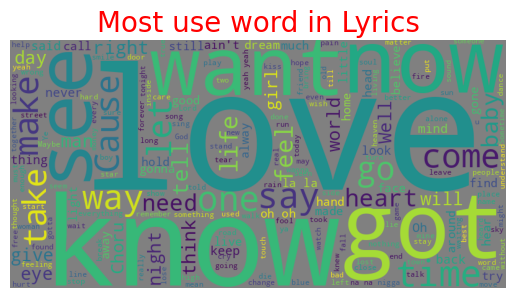

In [ ]:
plt.imshow(wordcloud) #It's used to display image data (like a word cloud, photo, or matrix as an image).
plt.title("Most use word in Lyrics" ,color='red', fontsize=20)
plt.axis('off') # This hides the x and y axis lines and tick marks around the image.
                # It makes your word cloud look cleaner, like a picture without borders or numbers.
plt.show()

Data Preprocessing

1. Punkt :
* punkt is a tokenizer model in NLTK.
* It helps break text into words or sentences.
* You need to download it once using nltk.download('punkt').

2. Stopword :
* Stopwords = common words that are usually removed from text.
* NLTK provides ready-made stopword lists.
* Useful for cleaning up text before analysis (like for word clouds, sentiment analysis, etc.).

In [ ]:
# Using nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):               # defines a function named preprocess_text that takes a string called text as input.
  # Remove special characters and number
  text = re.sub(r"[^a-zA-Z\s]","",text)  # Special characters (like !, @, #, &, etc.) , Numbers (0–9) , Letters (a–z, A–Z)
                                         # re.sub(re library)
  # conveting to lowercase
  text = text.lower()                # Words like "Love" and "love" mean the same thing, but computers treat them as different if you don't lowercase them.

  # tokenize and removing stopwords
  tokens = word_tokenize(text)           # word_tokenize(text),	Splits text into words,	So you can process each word
  tokens =[word for word in tokens if word not in stop_words]  # Remove stopwords,	Keeps only important words,	Removes noise like "is", "the", etc.
  return" " .join(tokens)                # " ".join(tokens)	, Rebuilds cleaned sentence	,So it's readable and usable.


In [ ]:
# apply preprocessing to the lyrics
song_df['cleaned_text'] = song_df['text'].apply( preprocess_text)
# .apply(preprocess_text) = Applies the preprocess_text() function to each row (each song lyric) in the 'text' column.
# song_df['cleaned_text'] = Stores the cleaned version of each song's lyrics in a new column called 'cleaned_text'.

song_df.head()

,artist,song,text,cleaned_text
0,Young Jeezy,Over Here,"We getting money over here, what it do pimpin'...",getting money pimpin see ya boys looking yall ...
1,Pet Shop Boys,King's Cross,The man at the back of the queue was sent \r\...,man back queue sent feel smack firm government...
2,Korn,I Will Protect You,What you gonna do and what you gonna feel when...,gon na gon na feel suddenly slip away almost g...
3,Gary Numan,Something's In The House,Memories lost in the faded films \r\nOf my li...,memories lost faded films life friend used som...
4,Chaka Khan,Any Love,You go out every night as a single \r\nBut yo...,go every night single dont really know see som...


1. Vectorization with TF-IDF

When working with text (like song lyrics), you need to convert words into numbers so that machines (like ML models) can understand and process them. This process is called vectorization.

In [ ]:
# vectorization with TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)            # converting in words into numeric value
matrix = vectorizer.fit_transform(song_df['cleaned_text'])  # saving inform of matrix in (song_df['cleaned_text']) for cosin similarity

In [ ]:
print(matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1187515 stored elements and shape (20000, 10000)>
  Coords	Values
  (0, 3592)	0.08174561081614723
  (0, 5616)	0.17491799027263524
  (0, 6445)	0.15554545577079085
  (0, 7591)	0.04160010783893127
  (0, 9921)	0.11936227313552177
  (0, 998)	0.09017261185446111
  (0, 5125)	0.07383887712108421
  (0, 9926)	0.12916664385969812
  (0, 4837)	0.10176681631480192
  (0, 138)	0.0737027410487515
  (0, 8961)	0.17433314428773772
  (0, 4117)	0.06351628655387861
  (0, 9938)	0.06933837756250204
  (0, 9913)	0.06903514273164942
  (0, 9801)	0.2847680298939105
  (0, 3687)	0.0817935664408761
  (0, 5883)	0.22153174595204872
  (0, 3483)	0.45685999011436457
  (0, 2533)	0.1454288918286809
  (0, 9871)	0.38971581446228526
  (0, 986)	0.3514045772216594
  (0, 8032)	0.12867671810374195
  (0, 8296)	0.08650522415134586
  (0, 2148)	0.09928015670351983
  (0, 4343)	0.034946022928448846
  :	:
  (19999, 9913)	0.0650942418629421
  (19999, 3452)	0.1455430918798377
  (

it's crashing due lode on ram , so a alternative is there for it , known as linear_kernel() . But here i have created a sample space of 20000 , so cosin similarity can be performed

In [ ]:
# using cosine Similarity
similarity_scores = cosine_similarity(matrix,matrix)

In [ ]:
# Recommendation Function
def recommend_songs(song_name, similarity_scores=similarity_scores,song_df=song_df, top_n=10):
    # Find the index of the song
    idx = song_df[song_df['song'].str.lower() == song_name.lower()].index
    if len(idx) ==0:
      return"Song not found "
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(similarity_scores[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return song_df[['artist', 'song']].iloc[song_indices]


In [ ]:
song_df.iloc[1] # Instead of song_df[n], which tries to access a column named 'n',
                # use .iloc[2] to access the row at index 2 (the third row).( example)


,1
artist,Pet Shop Boys
song,King's Cross
text,The man at the back of the queue was sent \r\...
cleaned_text,man back queue sent feel smack firm government...


In [ ]:

recommendations = recommend_songs("2 am")
print(recommendations)

                         artist                                       song
6527                David Bowie                              Little Wonder
16731             Lenny Kravitz                                      Again
162    Electric Light Orchestra                 The Way Life's Meant To Be
17658             Frank Sinatra                                  Charmaine
1898                   Maroon 5                          To Her, With Love
12215                 Tom Waits  I Hope That I Don't Fall In Love With You
15696                Wang Chung                      To Live And Die In La
818                  Neil Young                               I Wonder Why
6105              Fleetwood Mac                               I Wonder Why
6377                  Offspring                               Get It Right
